# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
# Code Here
!pip install palmerpenguins

In [2]:
import palmerpenguins
import pandas as pd
import numpy as np

# Load the penguins dataset into a pandas DataFrame
df = palmerpenguins.load_penguins()

# Display the first few rows

df=df.dropna()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [4]:
# Code Here
from sklearn.linear_model import LinearRegression

In [5]:
X_train = df[["bill_length_mm"]]
y_train = df["bill_depth_mm"]

bill_model = LinearRegression()
bill_model.fit(
    X=X_train,
    y=y_train
)

LinearRegression()

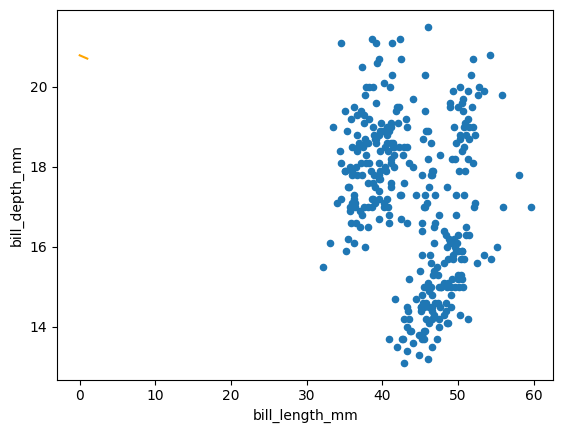

In [9]:
X_new = pd.DataFrame()
X_new["bill_length_mm"] = np.linspace(0,1,num=10000)
y_new = pd.Series(
    bill_model.predict(X_new),
    index = X_new["bill_length_mm"]
)
df.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new.plot.line(c="orange");

In [10]:
y_train_ = bill_model.predict(X=X_train)
y_train_

array([17.56767261, 17.53474191, 17.46888051, 17.76525682, 17.55120726,
       17.58413796, 17.55943994, 17.4030191 , 17.60883599, 17.938143  ,
       17.77348949, 17.60060331, 17.28776165, 17.95460835, 16.99961801,
       17.67469739, 17.68293007, 17.83111822, 17.64176669, 17.59237064,
       17.88051427, 17.44418248, 17.45241516, 17.66646471, 17.45241516,
       17.53474191, 17.72409344, 17.53474191, 17.41948445, 17.78995484,
       17.55943994, 17.59237064, 17.31245968, 17.69116274, 17.51004388,
       17.78172217, 17.42771713, 17.82288555, 17.15603884, 17.74055879,
       17.52650923, 17.4030191 , 17.82288555, 17.304227  , 17.52650923,
       17.48534586, 17.9052123 , 17.32892503, 17.94637568, 17.37832108,
       17.57590529, 17.44418248, 17.78172217, 17.69116274, 17.84758357,
       17.38655375, 17.69116274, 17.4030191 , 17.78995484, 17.36185573,
       17.86404892, 17.4030191 , 17.83111822, 17.34539038, 18.02870243,
       17.51827656, 17.52650923, 17.01608336, 17.86404892, 17.26

In [11]:
df["bill_predict"] = y_train_
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_predict
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,17.567673
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,17.534742
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,17.468881
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,17.765257
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,17.551207
...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,16.192816
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,17.205435
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,16.703242
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,16.604450


In [12]:
mse = ((y_train - y_train_)**2).mean()
mse

np.float64(3.664155709957263)

In [13]:
rmse = np.sqrt(mse)
rmse

np.float64(1.914198451038257)

In [16]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error
mean_squared_error(y_train, y_train_)


3.664155709957263

In [17]:
root_mean_squared_error(y_train, y_train_)

1.914198451038257

In [18]:
y_train.std()

1.9692354633199

In [19]:
from sklearn.metrics import mean_absolute_error, r2_score
mean_absolute_error(y_train, y_train_)

1.5816744416781439

In [20]:
r2_score(y_train, y_train_)

0.0522696813966369

In [21]:
df["bill_2"] = df["bill_length_mm"] ** 2
df["bill_3"] = df["bill_length_mm"] ** 3
df["bill_4"] = df["bill_length_mm"] ** 4
df["bill_5"] = df["bill_length_mm"] ** 5
df["random_noise1"] = np.random.normal(0, 0.1, size=len(df))
df["random_noise2"] = np.random.normal(0,0.2, size=len(df))
df["random_noise3"] = np.random.normal(0,0.3,size=len(df))
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_predict,bill_2,bill_3,bill_4,bill_5,random_noise1,random_noise2,random_noise3
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,17.567673,1528.81,59776.471,2.337260e+06,9.138687e+07,0.068230,-0.146716,0.124878
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,17.534742,1560.25,61629.875,2.434380e+06,9.615801e+07,-0.053526,0.250724,-0.380037
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,17.468881,1624.09,65450.827,2.637668e+06,1.062980e+08,-0.153284,-0.140811,0.274250
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,17.765257,1346.89,49430.863,1.814113e+06,6.657794e+07,-0.009155,0.319886,-0.055882
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,17.551207,1544.49,60698.457,2.385449e+06,9.374816e+07,0.106848,0.045700,0.532646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,16.192816,3113.64,173741.112,9.694754e+06,5.409673e+08,0.020462,0.035608,-0.129882
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,17.205435,1892.25,82312.875,3.580610e+06,1.557565e+08,0.165866,-0.032604,0.152592
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,16.703242,2460.16,122023.936,6.052387e+06,3.001984e+08,-0.033015,0.242492,-0.202099
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,16.604450,2580.64,131096.512,6.659703e+06,3.383129e+08,-0.004922,0.077594,0.204919


In [30]:
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "Model 1": ['bill_length_mm'],
    "Model 2": ['bill_length_mm', 'bill_2'],
    "Model 3": ['bill_length_mm', 'bill_2', 'bill_3'],
    "Model 4": ['bill_length_mm', 'bill_2', 'bill_3', 'bill_4']

}

rows = []
for name, Xcols in models.items():
  X_train = df[Xcols]
  y_true = y_train
  model = LinearRegression().fit(X_train, y_true)
  y_pred = model.predict(X_train)

  df[f"{name}_predict"] = y_pred

  train_mse = mean_squared_error(y_true, y_pred)
  train_r2 = r2_score(y_true, y_pred)

  rows.append({"Model": name,
               "Train MSE": train_mse,
               "Train R2": train_r2,
               'Flexibility': len(Xcols)})
  train_error = pd.DataFrame(rows)
  train_error

In [31]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_predict,bill_2,bill_3,bill_4,bill_5,random_noise1,random_noise2,random_noise3,Model 1_predict,Model 2_predict,Model 3_predict,Model 4_predict
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,17.567673,1528.81,59776.471,2.337260e+06,9.138687e+07,0.068230,-0.146716,0.124878,17.567673,17.567673,17.567673,17.567673
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,17.534742,1560.25,61629.875,2.434380e+06,9.615801e+07,-0.053526,0.250724,-0.380037,17.534742,17.534742,17.534742,17.534742
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,17.468881,1624.09,65450.827,2.637668e+06,1.062980e+08,-0.153284,-0.140811,0.274250,17.468881,17.468881,17.468881,17.468881
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,17.765257,1346.89,49430.863,1.814113e+06,6.657794e+07,-0.009155,0.319886,-0.055882,17.765257,17.765257,17.765257,17.765257
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,17.551207,1544.49,60698.457,2.385449e+06,9.374816e+07,0.106848,0.045700,0.532646,17.551207,17.551207,17.551207,17.551207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,16.192816,3113.64,173741.112,9.694754e+06,5.409673e+08,0.020462,0.035608,-0.129882,16.192816,16.192816,16.192816,16.192816
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,17.205435,1892.25,82312.875,3.580610e+06,1.557565e+08,0.165866,-0.032604,0.152592,17.205435,17.205435,17.205435,17.205435
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,16.703242,2460.16,122023.936,6.052387e+06,3.001984e+08,-0.033015,0.242492,-0.202099,16.703242,16.703242,16.703242,16.703242
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,16.604450,2580.64,131096.512,6.659703e+06,3.383129e+08,-0.004922,0.077594,0.204919,16.604450,16.604450,16.604450,16.604450


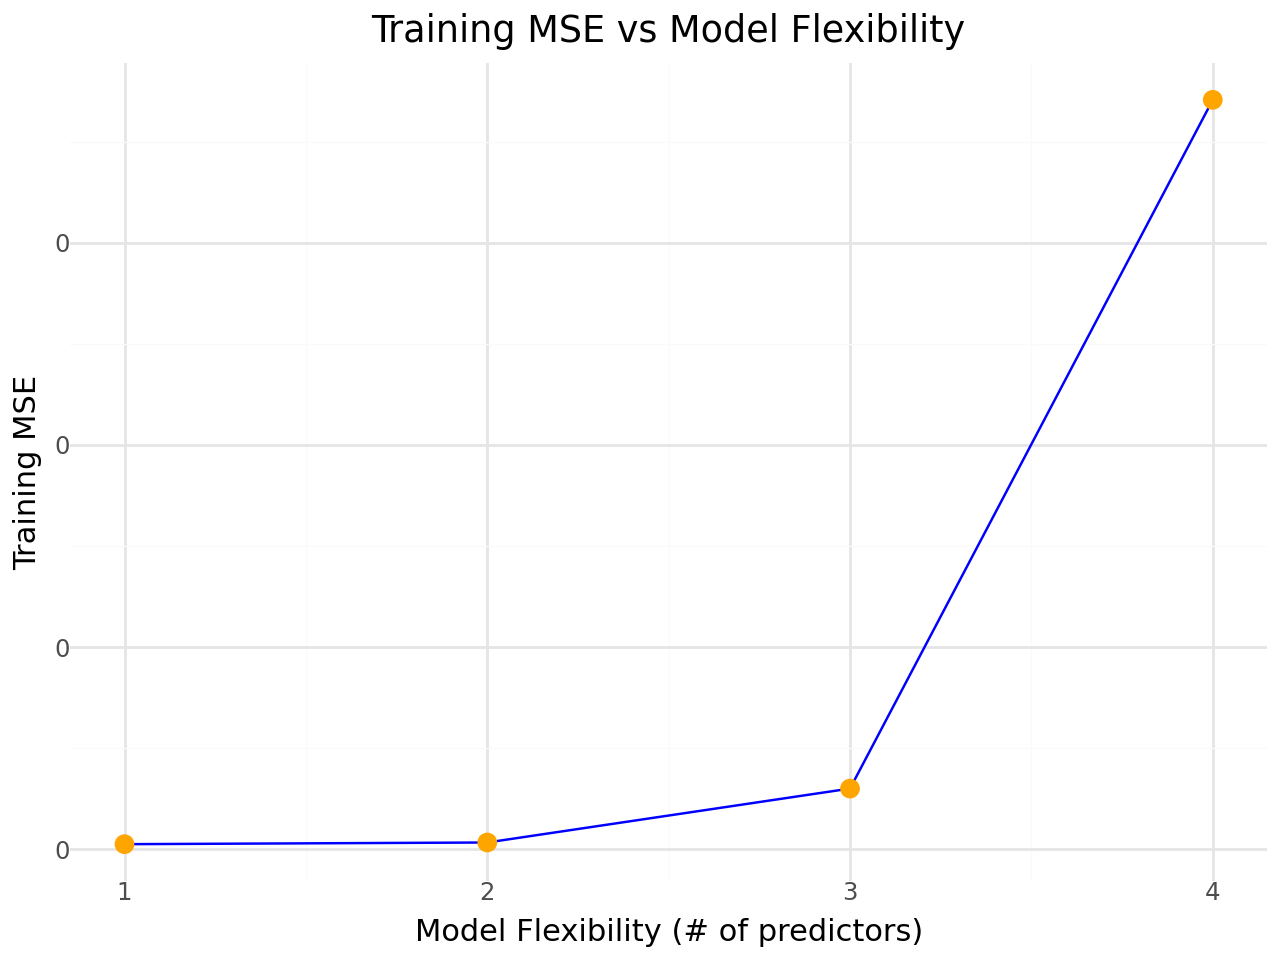

In [32]:
import plotnine
from plotnine import *
ggplot(train_error, aes(x="Flexibility", y="Train MSE")) + \
geom_line(color="blue") + \
geom_point(size=3, color="orange") + \
labs(
    title="Training MSE vs Model Flexibility",
    x = "Model Flexibility (# of predictors)",
    y="Training MSE"
) + \
theme_minimal()